In [46]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import numpy as np
import pandas as pd 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

rcParams['figure.figsize'] = 10, 7.5
rcParams['figure.dpi'] = 80
covidTweets = pd.read_csv("covid19_tweets.csv")

In [41]:
df = pd.read_csv("covid19_tweets1.csv")
df.head()
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


<h1> Objetivo #1 </h1>

<h3> Conocer la relación entre la información y número de tweets por zona geográfica (país) con su situación actual con respecto al COVID-19 </h3>

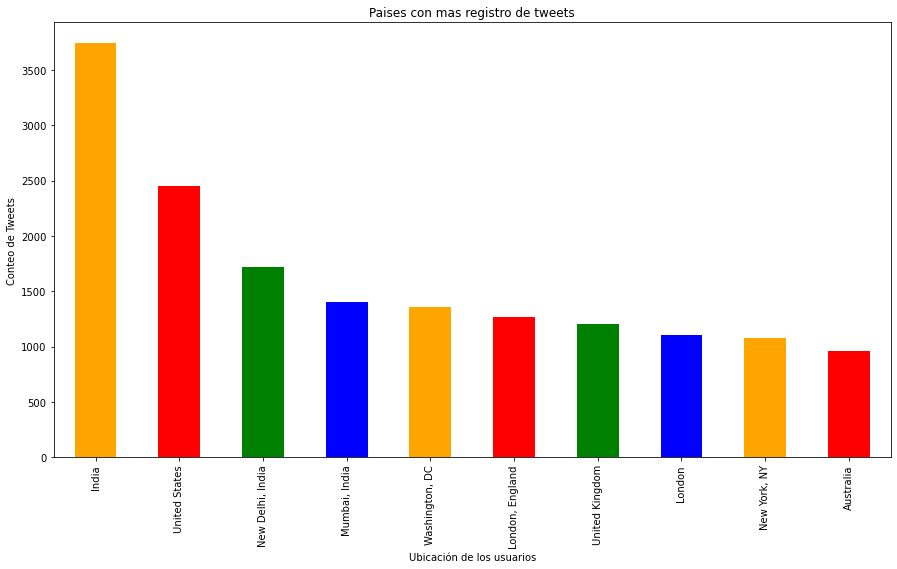

In [42]:
plt.figure(figsize=(15,8))
loca = df['user_location'].value_counts().sort_values(ascending=False)
loc= loca.head(10)
loc.plot.bar(color=['orange', 'red', 'green', 'blue'])
plt.title('Paises con mas registro de tweets')
plt.xlabel('Ubicación de los usuarios')
plt.ylabel('Conteo de Tweets')
plt.show()

In [43]:
def hashtag(x):
  x = str(x)
  x = x.replace('[','')
  x = x.replace(']','')
  x = x.split(',')
  return x
df['hashtag'] = df['hashtags'].apply(lambda y : hashtag(y))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str)
df['hashtag'] = df['hashtag'].str.replace("'",'')
df['hashtag'] = df['hashtag'].str.replace('"','')
df['hashtag'] = df['hashtag'].str.replace(" ",'')
df= df[df['hashtag'] != 'nan']

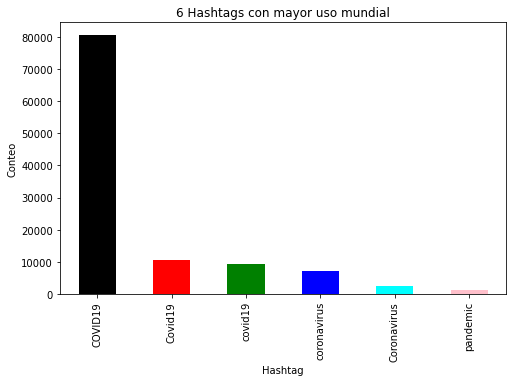

In [54]:
# Hashtags en todo el mundo
plt.figure(figsize=(8,5))
source = df['hashtag'].value_counts().sort_values(ascending=False)
source = souce.head(6)
source.plot.bar(color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.title('6 Hashtags con mayor uso mundial')
plt.xlabel('Hashtag')
plt.ylabel('Conteo')
plt.show()

C:\Users\leona\Anaconda\envs\SemanaTecAnalitica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



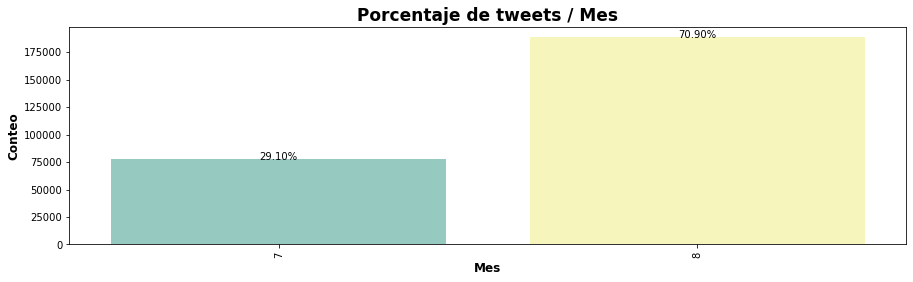

C:\Users\leona\Anaconda\envs\SemanaTecAnalitica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



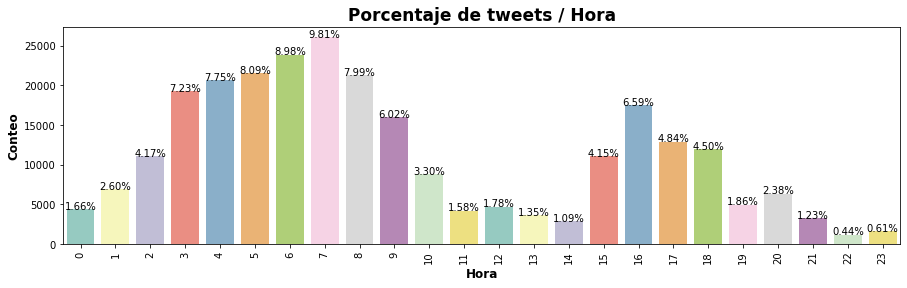

In [52]:
df['datedt'] = pd.to_datetime(df['date'])
df['Mes'] = df['datedt'].dt.month
df['Hora'] = df['datedt'].dt.hour
df['date_only'] = df['datedt'].dt.date

def countplot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(15,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Porcentaje de {}".format(title),weight='bold', size=17)
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.xlabel(feature, size=12, weight='bold')
    plt.ylabel('Conteo', size=12, weight='bold')
    plt.show() 

countplot("Mes", "tweets / Mes", df, size=3, ordered=False)
countplot("Hora", "tweets / Hora", df,size=4, ordered=False)

<h1> Objetivo #2 </h1>

<h3>Conocer la relación entre el giro laboral de las cuentas de twitter y el número de publicaciones que hacen con respecto al COVID-19, a través de gráficas que serán programadas a lo largo de la semana con ayuda de los datos recopilados por Kaggle. </h3>

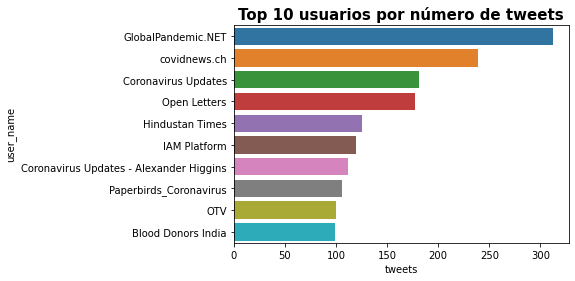

In [39]:
#Usuarios con mayor número de publicaciones 
numero_tweets = df['user_name'].value_counts().reset_index()
numero_tweets.columns = ['user_name', 'tweets']
plt.title('Top 10 usuarios por número de tweets',weight='bold', size=15)

sns.barplot(x = "tweets", y = "user_name", data = numero_tweets.head(10))
plt.show()

/opt/anaconda3/envs/NuevoSemanaTec/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/NuevoSemanaTec/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/NuevoSemanaTec/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/NuevoSemanaTec/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127480 missing from current font.



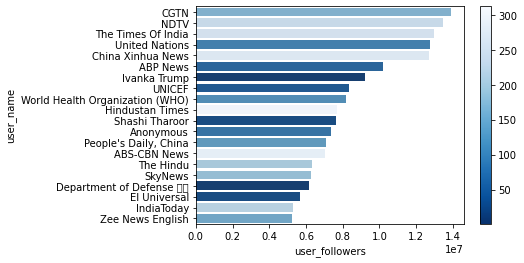

In [40]:
#Relación entre las cuentas con mayores seguidores y el número de publicaciones 
top_users = df.sort_values('user_followers', ascending =  False).drop_duplicates(subset = 'user_name', keep = 'first')
top_users = top_users[['user_name', 'user_followers']]
top_users = pd.merge(top_users, numero_tweets, 'inner')


norm = plt.Normalize(top_users['tweets'].min(), top_users['tweets'].max())
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

ax = sns.barplot(x="user_followers", y = "user_name", data = top_users.head(20), hue = 'tweets', dodge = False, palette = 'Blues_r')
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

<h1> Objetivo #3</h1>

<h3> Conocer la relación entre las fuentes principales de los tweets con el objetivo de la cuenta. </h3>

/opt/anaconda3/envs/NuevoSemanaTec/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



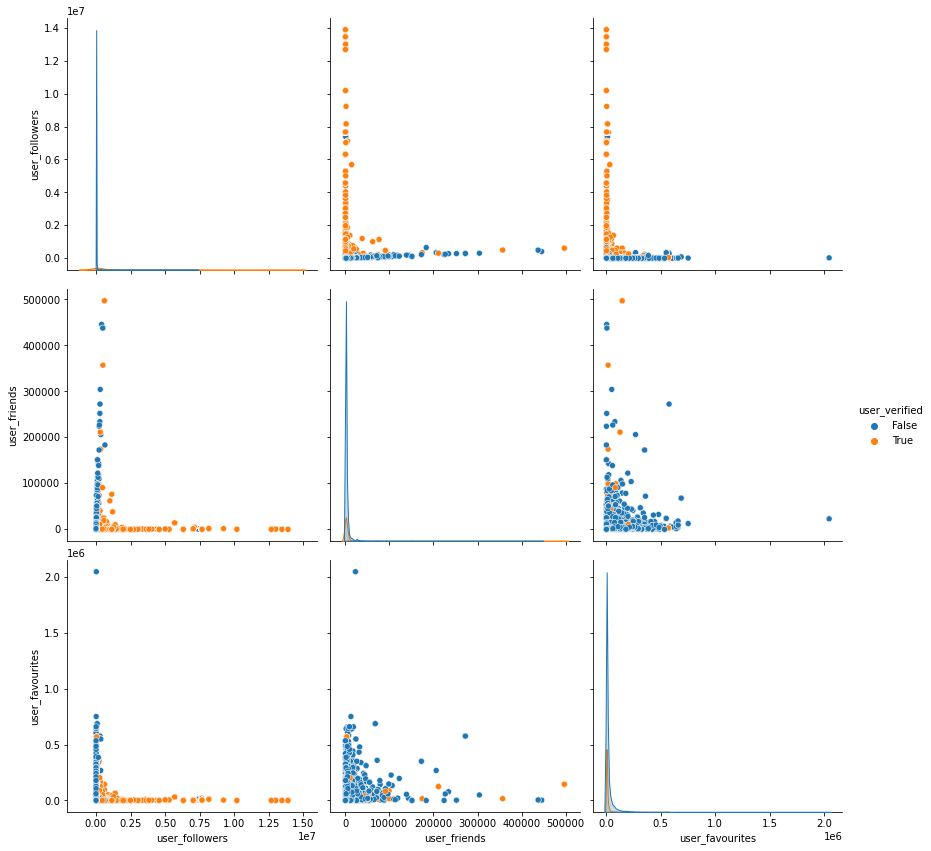

In [41]:
sns.pairplot(df.dropna(), hue='user_verified',size=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

In [42]:
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
# Como se ve, sólo cargamos las columnas user_followers, user_friends y user_favourites en nuestra variable X.
X = np.array(df[["user_followers","user_friends","user_favourites"]])
y = np.array(df['user_verified'])
X.shape

(74436, 3)

<ipython-input-47-8d976f481047>:7: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



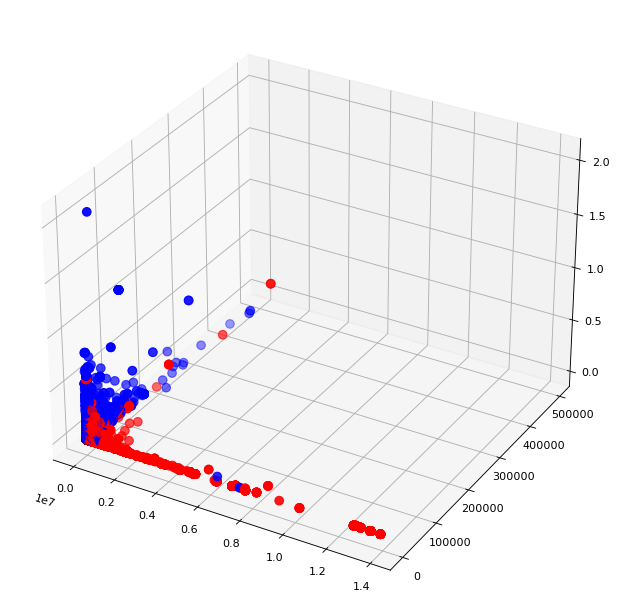

In [47]:
# A continuación veremos una gráfica en 3D con 2 colores representando las categorías de True y False por user_verified
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

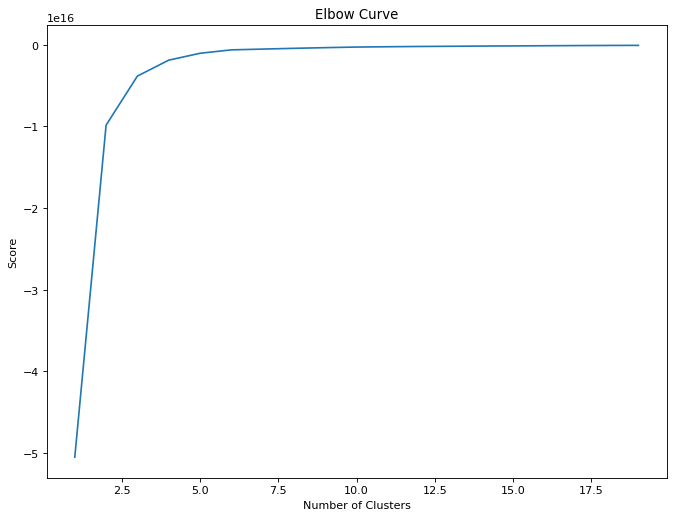

In [48]:
# Se va a hallar el valor de K haciendo una gráfica e intentando encontrar el “punto de codo” que comentábamos antes.
# Este es nuestro resultado con la gráfica que se muestra:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
# Ejecutamos el algoritmo para 3 clusters y obtenemos sus etiquetas y los centroides.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.12057722e+04 2.17079378e+03 1.54347130e+04]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [5.77398910e+06 7.12457851e+02 2.63533719e+03]]


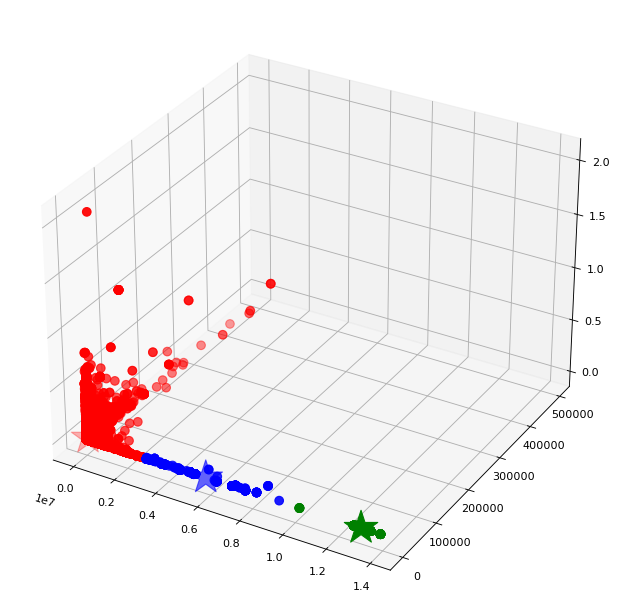

In [50]:
# Ahora lo veremos en una gráfica 3D con colores para cada grupo y veremos si se diferencian: 
# las estrellas marcan el centro de cada cluster
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
# Aqui podemos ver que el Algoritmo de K-Means con K=3 ha agrupado a los usuarios de Twitter por sus datos antes 
# mencionados, teniendo en cuenta las 3 dimensiones que utilizamos. 

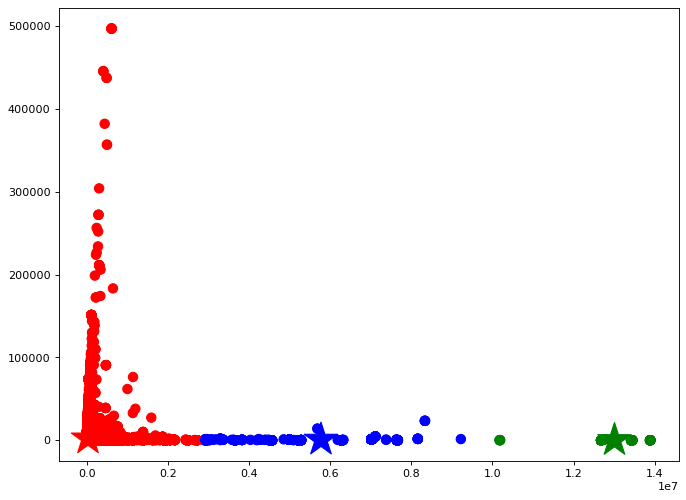

In [51]:
# Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
# para que nos ayude a visualizar los grupos y su clasificación:
# En estas gráficas podremos ver que se encuentran bien diferenciados los grupos.
# Getting the values and plotting it
f1 = df['user_followers'].values
f2 = df['user_friends'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

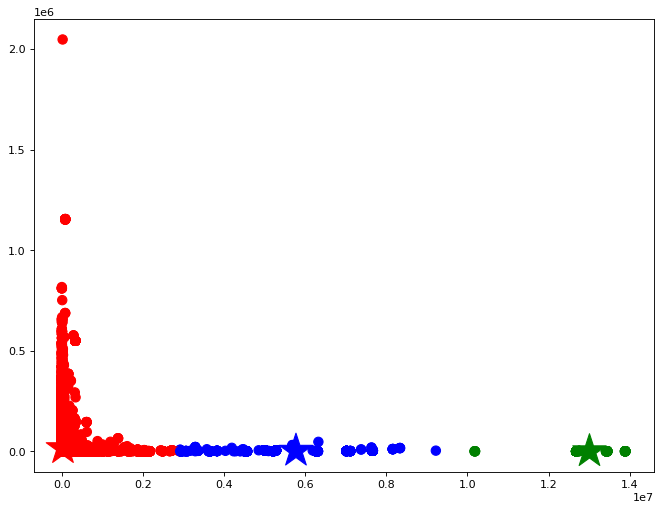

In [52]:
# Getting the values and plotting it
f1 = df['user_followers'].values
f2 = df['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

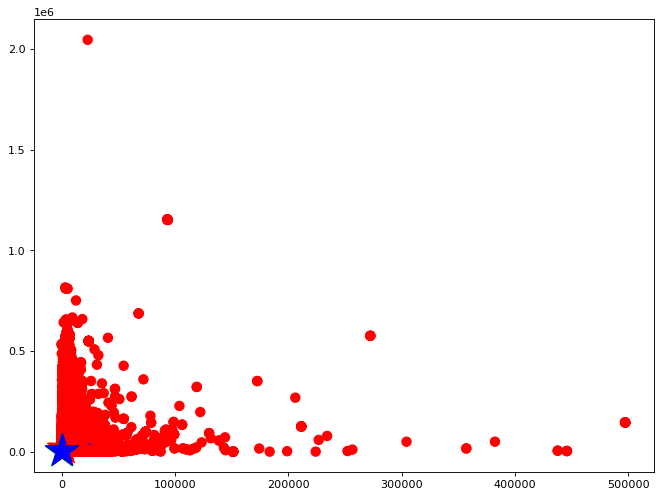

In [53]:
# Getting the values and plotting it
f1 = df['user_friends'].values
f2 = df['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [54]:
# Ver cantidad de datos por grupo
copy =  pd.DataFrame()
copy['user_name']=df['user_name'].values
copy['user_verified']=df['user_verified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73670
1,green,161
2,blue,605


In [55]:
#Código para ver el top 40 de fuentes usadas
ds = df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'])

#Configurar la gráfica del top 40 usando los datos del dataframe ds.
fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="source", 
    orientation='h', 
    title='Top 40 user sources by number of tweets', 
    width=800, 
    height=800
)

fig.show()

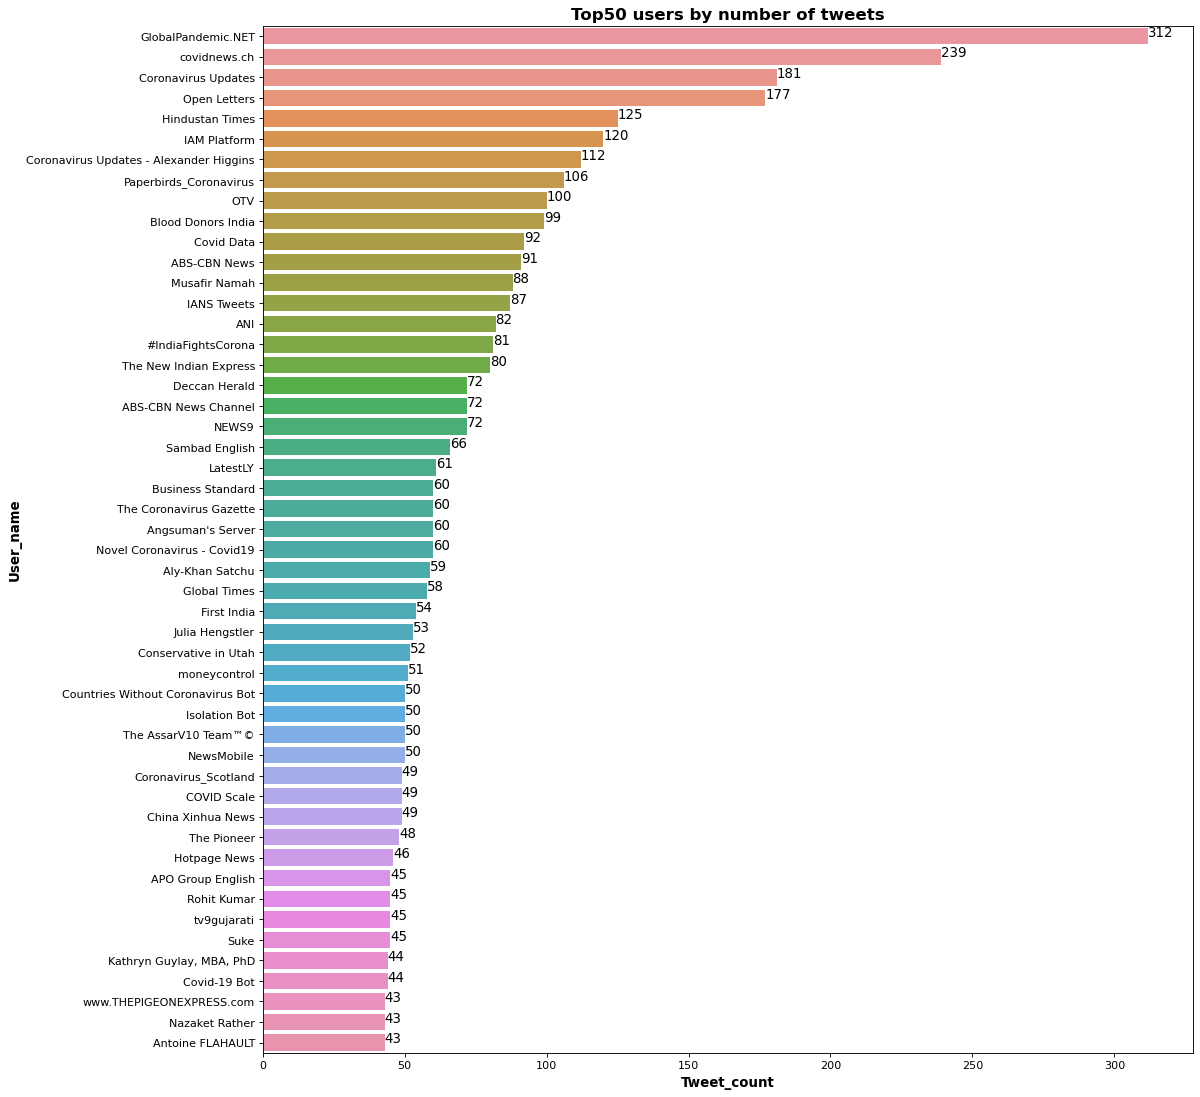

In [56]:
df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='tweet_count',data=df_username_count.head(50))
y=df_username_count['tweet_count'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of tweets',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Tweet_count', size=12, weight='bold')
plt.show()

In [57]:
'''
Código para conocer la cantidad de tweets que salen de cada fuente principal basándonos en 
los grupos obtenidos con el algoritmo k-means.
'''

#Copiar los objetos de un grupo particular
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

#Contador de las fuentes principales
sourceCount = {"Twitter for iPhone": 0, "Twitter for Android": 0, "Twitter Web App": 0}

#Loop para iterar por las filas de datos y añadir la fuente a su respectivo contador
for index, row in group_referrals.iterrows():
    if df.at[index, "source"] == "Twitter for iPhone":
        sourceCount["Twitter for iPhone"] += 1
        
    elif df.at[index, "source"] == "Twitter for Android":
        sourceCount["Twitter for Android"] += 1
    
    elif df.at[index, "source"] == "Twitter Web App":
        sourceCount["Twitter Web App"] += 1
        

print(sourceCount)

{'Twitter for iPhone': 15821, 'Twitter for Android': 16753, 'Twitter Web App': 22684}


In [58]:
'''
Código para conocer la cantidad de tweets que salen de cada fuente principal basándonos en 
los tweets de usuarios con mayor número de tweets.
'''

#Juntar dataframes para tener columna de tweet_count y poder ordenarlos con respecto a esa columna
df.drop(columns = "tweet_count_x")
df.drop(columns = "tweet_count_y")
df = pd.merge(df, df_username_count, on='user_name')

newSortedTweets = df.sort_values(by = "tweet_count", ascending = False)

#Contadores para cada opción de fuente
sourceCount2 = {"Twitter for iPhone": 0, "Twitter for Android": 0, "Twitter Web App": 0}

#Iterar sobre el dataframe y añadir la fuente al contador respectivo 
for i in range(0,10000):
    if newSortedTweets.at[i, "source"] == "Twitter for iPhone":
        sourceCount2["Twitter for iPhone"] += 1
        
    elif newSortedTweets.at[i, "source"] == "Twitter for Android":
        sourceCount2["Twitter for Android"] += 1
    
    elif newSortedTweets.at[i, "source"] != "Twitter Web App":
        #print(newSortedTweets.at[i, "source"])
        sourceCount2["Twitter Web App"] += 1
        
print(sourceCount2)

KeyError: "['tweet_count_x'] not found in axis"

In [ ]:
'''
Código para conocer la cantidad de tweets que salen de cada fuente principal basándonos en 
popularidad (mayor número de followers).
'''

#Ordenar dataframe por número de followers
followerSortedTweets = df.sort_values(by = "user_followers", ascending = False)

#Contadores para cada opción de fuente
sourceCount3 = {"Twitter for iPhone": 0, "Twitter for Android": 0, "Twitter Web App": 0}

#Iterar sobre el dataframe y añadir la fuente al contador respectivo 
for i in range(0,5000):
    if followerSortedTweets.at[i, "source"] == "Twitter for iPhone":
        sourceCount3["Twitter for iPhone"] += 1
        
    elif followerSortedTweets.at[i, "source"] == "Twitter for Android":
        sourceCount3["Twitter for Android"] += 1
    
    elif followerSortedTweets.at[i, "source"] != "Twitter Web App":
        #print(newSortedTweets.at[i, "source"])
        sourceCount3["Twitter Web App"] += 1
        
print(sourceCount3)

Agradecimientos a Notebooks:
Covid_geo_complete_analysis

